# 制限3体問題

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/ymatumot/JST/blob/main/manybody_2gal.ipynb)

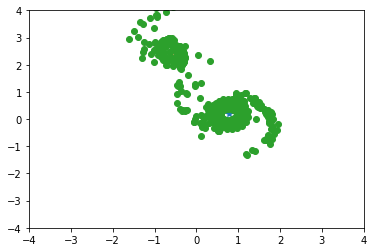

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N=400
xa = 0.0
ya = 0.0
vxa= 0.0
vya= 0.0
xb = 2.0
yb =-2.0
mb = 0.3
dt = 0.01
tmax = 10.0
vxb = 0.0
vyb = 1.0
x = np.zeros(N)
y = np.zeros(N)
vx = np.zeros(N)
vy = np.zeros(N)
k0 = np.zeros(4)
k1 = np.zeros(4)
k2 = np.zeros(4)
k3 = np.zeros(4)

for i in range(0,int(N/2)):
  r = 0.08*int(i/20)+0.2
  th= 0.31416*int(i%20)
  x[i] = xa+r*np.cos(th)
  y[i] = ya+r*np.sin(th)
  vx[i]= vxa-np.sin(th)*np.sqrt(1.0/r)
  vy[i]= vya+np.cos(th)*np.sqrt(1.0/r)

for i in range(int(N/2),N):
  r = 0.04*((i-int(N/2))/20)+0.2
  th= 0.31416*((i-int(N/2))%20)
  x[i] = xb+r*np.cos(th)
  y[i] = yb+r*np.sin(th)
  vx[i]= vxb-np.sin(th)*np.sqrt(mb/r)
  vy[i]= vyb+np.cos(th)*np.sqrt(mb/r)

t=0
tmax=5.0
while t < tmax:
  rb = np.sqrt((xa-xb)*(xa-xb)+(ya-yb)*(ya-yb))
  rb3= rb*rb*rb
  k0[0]= dt*vxa
  k0[1]= dt*vya
  k0[2]= dt*(-mb*(xa-xb)/rb3)
  k0[3]= dt*(-mb*(ya-yb)/rb3)
  x1 = xa+k0[0]/2.0
  y1 = ya+k0[1]/2.0
  vx1=vxa+k0[2]/2.0
  vy1=vya+k0[3]/2.0
  rb = np.sqrt((x1-xb)*(x1-xb)+(y1-yb)*(y1-yb))
  rb3= rb*rb*rb
  k1[0]= dt*vx1
  k1[1]= dt*vy1
  k1[2]= dt*(-mb*(x1-xb)/rb3)
  k1[3]= dt*(-mb*(y1-yb)/rb3)
  x2 = xa+k1[0]/2.0
  y2 = ya+k1[1]/2.0
  vx2=vxa+k1[2]/2.0
  vy2=vya+k1[3]/2.0
  rb = np.sqrt((x2-xb)*(x2-xb)+(y2-yb)*(y2-yb))
  rb3= rb*rb*rb
  k2[0]= dt*vx2
  k2[1]= dt*vy2
  k2[2]= dt*(-mb*(x2-xb)/rb3)
  k2[3]= dt*(-mb*(y2-yb)/rb3)
  x3 = xa+k2[0]
  y3 = ya+k2[1]
  vx3=vxa+k2[2]
  vy3=vya+k2[3]
  rb = np.sqrt((x3-xb)*(x3-xb)+(y3-yb)*(y3-yb))
  rb3= rb*rb*rb
  k3[0]= dt*vx3
  k3[1]= dt*vy3
  k3[2]= dt*(-mb*(x3-xb)/rb3)
  k3[3]= dt*(-mb*(y3-yb)/rb3)
  xan =xa +(k0[0]+2.0*k1[0]+2.0*k2[0]+k3[0])/6.0
  yan =ya +(k0[1]+2.0*k1[1]+2.0*k2[1]+k3[1])/6.0
  vxan=vxa+(k0[2]+2.0*k1[2]+2.0*k2[2]+k3[2])/6.0
  vyan=vya+(k0[3]+2.0*k1[3]+2.0*k2[3]+k3[3])/6.0

  ra = np.sqrt((xb-xa)*(xb-xa)+(yb-ya)*(yb-ya))
  ra3= ra*ra*ra
  k0[0]=dt*vxb
  k0[1]=dt*vyb
  k0[2]=dt*(-(xb-xa)/ra3)
  k0[3]=dt*(-(yb-ya)/ra3)
  x1 =xb+k0[0]/2.0
  y1 =yb+k0[1]/2.0
  vx1=vxb+k0[2]/2.0
  vy1=vyb+k0[3]/2.0
  ra =np.sqrt((x1-xa)*(x1-xa)+(y1-ya)*(y1-ya))
  ra3= ra*ra*ra
  k1[0]=dt*vx1
  k1[1]=dt*vy1
  k1[2]=dt*(-(x1-xa)/ra3)
  k1[3]=dt*(-(y1-ya)/ra3)
  x2 =xb+k1[0]/2.0
  y2 =yb+k1[1]/2.0
  vx2=vxb+k1[2]/2.0
  vy2=vyb+k1[3]/2.0
  ra =np.sqrt((x2-xa)*(x2-xa)+(y2-ya)*(y2-ya))
  ra3=ra*ra*ra
  k2[0]=dt*vx2
  k2[1]=dt*vy2
  k2[2]=dt*(-(x2-xa)/ra3)
  k2[3]=dt*(-(y2-ya)/ra3)
  x3 =xb+k2[0]
  y3 =yb+k2[1]
  vx3=vxb+k2[2]
  vy3=vyb+k2[3]
  ra =np.sqrt((x3-xa)*(x3-xa)+(y3-ya)*(y3-ya))
  ra3=ra*ra*ra
  k3[0]=dt*vx3
  k3[1]=dt*vy3
  k3[2]=dt*(-(x3-xa)/ra3)
  k3[3]=dt*(-(y3-ya)/ra3)
  xbn =xb +(k0[0]+2.0*k1[0]+2.0*k2[0]+k3[0])/6.0
  ybn =yb +(k0[1]+2.0*k1[1]+2.0*k2[1]+k3[1])/6.0
  vxbn=vxb+(k0[2]+2.0*k1[2]+2.0*k2[2]+k3[2])/6.0
  vybn=vyb+(k0[3]+2.0*k1[3]+2.0*k2[3]+k3[3])/6.0

  for i in range(0,N):
    ra = np.sqrt((x[i]-xa)*(x[i]-xa)+(y[i]-ya)*(y[i]-ya))
    rb = np.sqrt((x[i]-xb)*(x[i]-xb)+(y[i]-yb)*(y[i]-yb))   
    ra3= ra*ra*ra
    rb3= rb*rb*rb
    k0[0]=dt*vx[i]
    k0[1]=dt*vy[i]
    k0[2]=dt*(-(x[i]-xa)/ra3-mb*(x[i]-xb)/rb3)
    k0[3]=dt*(-(y[i]-ya)/ra3-mb*(y[i]-yb)/rb3)
    x1 = x[i]+k0[0]/2.0
    y1 = y[i]+k0[1]/2.0
    vx1= vx[i]+k0[2]/2.0
    vy1= vy[i]+k0[3]/2.0
    ra = np.sqrt((x1-xa)*(x1-xa)+(y1-ya)*(y1-ya))
    rb = np.sqrt((x1-xb)*(x1-xb)+(y1-yb)*(y1-yb))
    ra3= ra*ra*ra
    rb3= rb*rb*rb
    k1[0]=dt*vx1
    k1[1]=dt*vy1
    k1[2]=dt*(-(x1-xa)/ra3-mb*(x1-xb)/rb3)
    k1[3]=dt*(-(y1-ya)/ra3-mb*(y1-yb)/rb3)
    x2 = x[i]+k1[0]/2.0
    y2 = y[i]+k1[1]/2.0
    vx2= vx[i]+k1[2]/2.0
    vy2= vy[i]+k1[3]/2.0
    ra = np.sqrt((x2-xa)*(x2-xa)+(y2-ya)*(y2-ya))
    rb = np.sqrt((x2-xb)*(x2-xb)+(y2-yb)*(y2-yb))
    ra3= ra*ra*ra
    rb3= rb*rb*rb
    k2[0]=dt*vx2
    k2[1]=dt*vy2
    k2[2]=dt*(-(x2-xa)/ra3-mb*(x2-xb)/rb3)
    k2[3]=dt*(-(y2-ya)/ra3-mb*(y2-yb)/rb3)
    x3 =x[i]+k2[0]
    y3 =y[i]+k2[1]
    vx3=vx[i]+k2[2]
    vy3=vy[i]+k2[3]
    ra = np.sqrt((x3-xa)*(x3-xa)+(y3-ya)*(y3-ya))
    rb = np.sqrt((x3-xb)*(x3-xb)+(y3-yb)*(y3-yb))
    ra3= ra*ra*ra
    rb3= rb*rb*rb
    k3[0]=dt*vx3
    k3[1]=dt*vy3
    k3[2]=dt*(-(x3-xa)/ra3-mb*(x3-xb)/rb3)
    k3[3]=dt*(-(y3-ya)/ra3-mb*(y3-yb)/rb3)
    x[i] =x[i] +(k0[0]+2.0*k1[0]+2.0*k2[0]+k3[0])/6.0
    y[i] =y[i] +(k0[1]+2.0*k1[1]+2.0*k2[1]+k3[1])/6.0
    vx[i]=vx[i]+(k0[2]+2.0*k1[2]+2.0*k2[2]+k3[2])/6.0
    vy[i]=vy[i]+(k0[3]+2.0*k1[3]+2.0*k2[3]+k3[3])/6.0
  xa=xan
  ya=yan
  xb=xbn
  yb=ybn
  vxa=vxan
  vya=vyan
  vxb=vxbn
  vyb=vybn
  t=t+dt
#  printf("%f %f\n",xa,ya);
#  printf("%f %f\n",xb,yb);
#  for i in range(0,N):   
#	    printf("%lf %lf\n",x[i],y[i]);
plt.xlim(-4.0,4.0)
plt.ylim(-4.0,4.0)
plt.plot(xa,ya,'*')
plt.plot(xb,yb,'*')
plt.plot(x,y,'o')   
plt.show()